In [1]:
import numpy as np
import pandas as pd
from astropy import table
from pathlib import Path
import os
import matplotlib.pyplot as plt
from scipy import interpolate
import treecorr as tc
from astropy.io.misc.hdf5 import read_table_hdf5
from astropy import units as u
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord

In [2]:
AREA_PER_HEALPIX = 57.071968/17 

In [3]:
# loop over the healpix and concat them together into one cat
path_healpix_ids = '/global/homes/y/yoki/roman/desi_like_samples/skysim_5000/data/healpix_ids/id_nums_exclude_edges.npy'
hpix_ids = np.load(path_healpix_ids)
cat_list = []
rand_list = []


for hpix in hpix_ids:
    path_mock_elgs = f'/global/homes/y/yoki/roman/desi_like_samples/skysim_5000/data/mocks_per_healpix/mock_elg_cat_per_pixel/mock_elg_cat_hpix_{hpix}.parquet'
    mock_elg_cat_loop = pd.read_parquet(path=path_mock_elgs)
    cat_list.append(mock_elg_cat_loop)

mock_elg_cat = pd.concat(cat_list)

for hpix in hpix_ids:
    path_mock_elg_rands = f'/global/homes/y/yoki/roman/desi_like_samples/skysim_5000/data/rands_per_healpix/rands_elg_cat_per_pixel/rand_elg_cat_hpix_{hpix}.parquet'
    mock_elg_rand_loop = pd.read_parquet(path=path_mock_elg_rands)
    rand_list.append(mock_elg_rand_loop)

rand_elg_cat = pd.concat(rand_list)

In [4]:
len(hpix_ids)

1502

In [5]:
mock_elg_cat

,redshift,redshift_hubble,s,rp,sfr,sfr_tot,stellar_mass,blackhole_mass,gal_id,mag_u,mag_g,mag_r,mag_i,mag_z,mag_y,ra,dec,ra_true,dec_true
22,0.030391,0.030508,133.695685,134.207394,0.0,6.750862e+08,2.656002e+09,1.852837e+06,8.258000e+12,17.959944,16.926687,16.422960,15.961289,15.673623,15.497918,4.934763,-20.571878,4.934985,-20.572355
56,0.029812,0.031363,131.167935,137.940467,0.0,5.329959e+08,3.089791e+09,0.000000e+00,8.258000e+12,18.113424,17.202385,16.770243,16.468365,16.245945,16.106285,6.093377,-20.490413,6.093611,-20.490919
57,0.028995,0.028246,127.600357,124.324935,0.0,1.548788e+09,2.214818e+10,1.131643e+08,8.258000e+12,17.105997,15.609321,14.887877,14.475121,14.141696,13.948562,6.035849,-20.427683,6.036086,-20.428187
64,0.049167,0.049888,215.329270,218.449466,0.0,6.267491e+08,4.837523e+09,9.296486e+06,8.258000e+12,18.900436,17.905636,17.419924,17.034437,16.788498,16.624798,5.789079,-20.870868,5.789306,-20.871361
179,0.064781,0.066167,282.644642,288.592999,0.0,1.452807e+09,1.268736e+11,2.702941e+08,8.258000e+12,17.320135,16.041269,15.388520,15.055192,14.822362,14.643388,4.983513,-20.919989,4.984210,-20.920888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401051,1.620717,1.611050,4697.208508,4680.089344,0.0,3.065741e+10,5.451244e+09,7.042726e+06,8.159101e+12,23.146448,23.292624,23.587757,23.668699,23.757589,23.610094,88.580181,-19.982473,88.584897,-19.988539
1406157,1.619167,1.615099,4694.468550,4687.270201,0.0,2.891519e+10,2.703756e+09,6.420116e+06,8.159101e+12,23.368700,23.513985,23.808592,23.887510,23.974304,23.826235,87.919349,-19.185883,87.915389,-19.200718
1412161,1.619471,1.612820,4695.007566,4683.230894,0.0,2.989499e+10,1.730931e+09,8.074864e+06,8.159101e+12,23.499262,23.645060,23.939968,24.020052,24.108053,23.960312,88.053726,-19.845133,88.048496,-19.850264
1416709,1.617590,1.613433,4691.680654,4684.318309,0.0,2.963116e+10,9.150226e+09,2.644428e+07,8.159101e+12,22.839144,22.984806,23.279636,23.359413,23.447098,23.299271,88.101923,-19.383414,88.098461,-19.399141


In [6]:
rand_elg_cat

,ra,dec,rp,s
0,5.905659,-20.436582,4259.803368,3081.756158
1,4.970813,-21.161557,2929.778035,2952.191072
2,5.520884,-21.131394,3802.799428,3295.841972
3,5.618815,-20.489130,4298.069464,3624.097458
4,5.147448,-20.674138,3097.147982,2959.546290
...,...,...,...,...
27495,88.865062,-18.741393,3468.205174,3609.791251
27496,87.812821,-19.798686,4081.288037,2617.847525
27497,88.399730,-19.338192,1950.520939,4258.774837
27498,89.051611,-19.410375,3413.176313,3391.600298


In [12]:
# load in the desi ELG distributions 
path_desi_data = Path('../data/desi_sv_data/desi_elg_ts_zenodo/main-800coaddefftime1200-nz-zenodo.ecsv')
desi_data = table.Table.read(path_desi_data, format='ascii.ecsv')
desi_data.colnames
zmin = desi_data['ZMIN']
zmax = desi_data['ZMAX']

lop_north = desi_data['ELG_LOP_NORTH']
lop_south_decal = desi_data['ELG_LOP_SOUTH_DECALS']
lop_south_des = desi_data['ELG_LOP_SOUTH_DES']
vlo_north = desi_data['ELG_VLO_NORTH']
vlo_south_decal = desi_data['ELG_VLO_SOUTH_DECALS']
vlo_south_des = desi_data['ELG_VLO_SOUTH_DES']

lop_desi = desi_data['ELG_LOP_DESI']
vlo_desi = desi_data['ELG_VLO_DESI']
weightedavg = (lop_north * 4400 + lop_south_decal * 8500 + lop_south_des * 1100 )/(14000)


#values, edges = np.histogram(spectro_z[ccuts], bins=np.linspace(0, 2, 41))

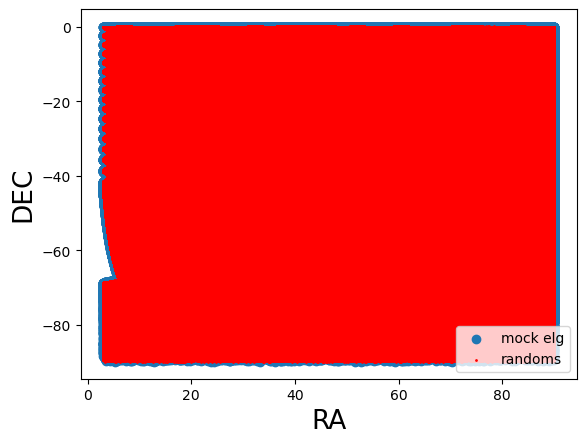

In [13]:
plt.scatter(mock_elg_cat['ra'], mock_elg_cat['dec'], label='mock elg')
plt.scatter(rand_elg_cat['ra'], rand_elg_cat['dec'], label='randoms', s=1, color='red')
# plt.xlim(53, 55)
# plt.ylim(-41, -36)
plt.ylabel('DEC', fontsize=19 )
plt.xlabel('RA', fontsize=19)
plt.legend(loc='lower right')

In [9]:

area_full = AREA_PER_HEALPIX * len(hpix_ids)
print(f'The total area of all healpix for SkySim5000 is {area_full}')

The total area of all healpix for SkySim5000 is 5042.476231529411


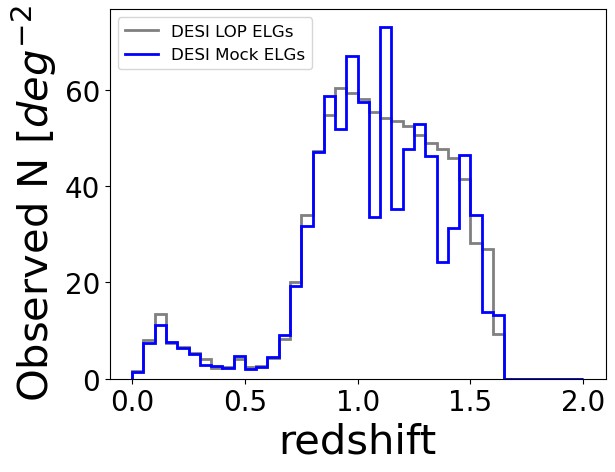

In [10]:
values_sim, edges = np.histogram(mock_elg_cat['redshift'], bins=np.linspace(0, 2, 41))


fig, ax = plt.subplots()
ax.stairs(weightedavg, edges, linewidth=2, color ='grey', label= 'DESI LOP ELGs')
ax.stairs(values_sim/(len(hpix_ids)*AREA_PER_HEALPIX), edges, linewidth=2, color='blue', label='DESI Mock ELGs')
# ax.axvline(x=1.10,ls='--', color='black')
# ax.axvline(x=1.60,ls='--', color='black')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('redshift', fontsize=30)
ax.set_ylabel('Observed N [$deg^{-2}]$', fontsize=30)
ax.legend(loc='upper left', fontsize=12)

In [14]:
hpix_id_0 = np.load(path_healpix_ids)[150]
hpix_id_1 = np.load(path_healpix_ids)[500]

path_mock_elg_0 = f'/global/homes/y/yoki/roman/desi_like_samples/skysim_5000/data/mocks_per_healpix/mock_elg_cat_per_pixel/mock_elg_cat_hpix_{hpix_id_0}.parquet'
path_mock_elg_1 = f'/global/homes/y/yoki/roman/desi_like_samples/skysim_5000/data/mocks_per_healpix/mock_elg_cat_per_pixel/mock_elg_cat_hpix_{hpix_id_1}.parquet'
mock_elg_cat_0 = pd.read_parquet(path=path_mock_elg_0)
mock_elg_cat_1 = pd.read_parquet(path=path_mock_elg_1)



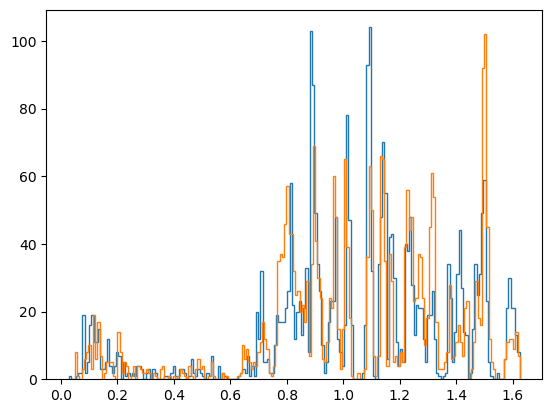

In [15]:
plt.hist(mock_elg_cat_0['redshift'], bins=200, histtype='step')
plt.hist(mock_elg_cat_1['redshift'], bins=200, histtype='step')
plt.show()